In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
ht = pd.read_csv("hearing_test.csv")
df = ht.copy()

In [3]:
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## Exploratory Data Analysis (EDA) and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df['test_result'].value_counts() # datalar arasında dengesizlik varmı. Classification modelde unbalance mücadele edeceğiz

1    3000
0    2000
Name: test_result, dtype: int64

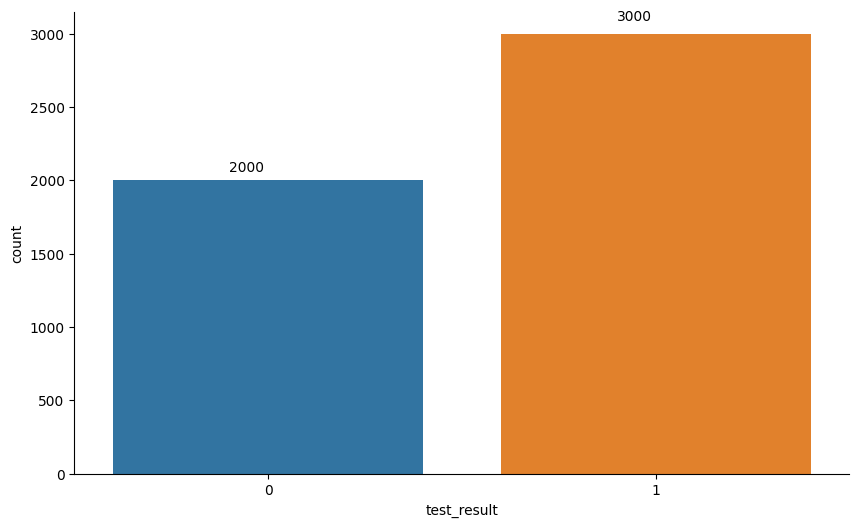

In [7]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

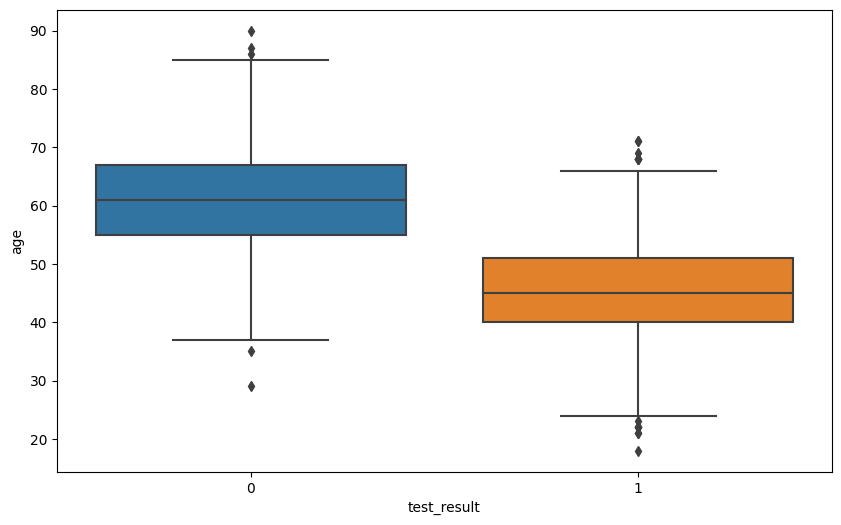

In [8]:
sns.boxplot(x = "test_result", y = "age", data = df);

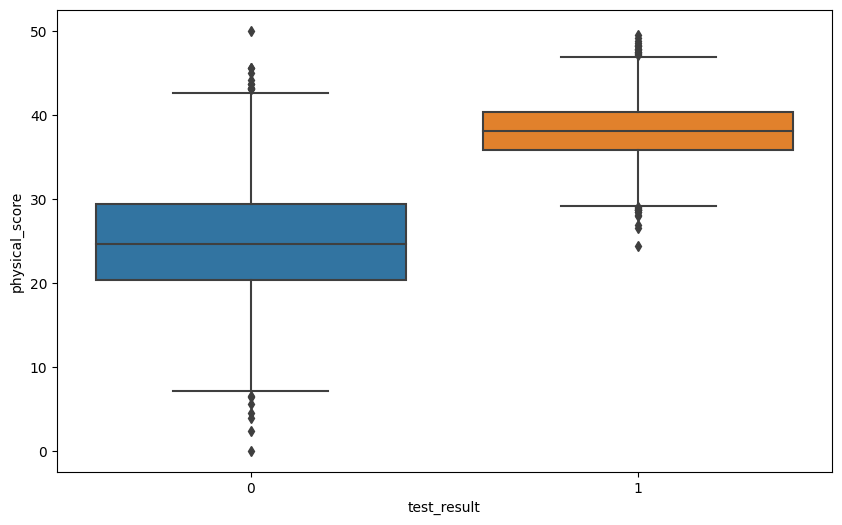

In [9]:
sns.boxplot(x = "test_result", y = "physical_score", data = df);

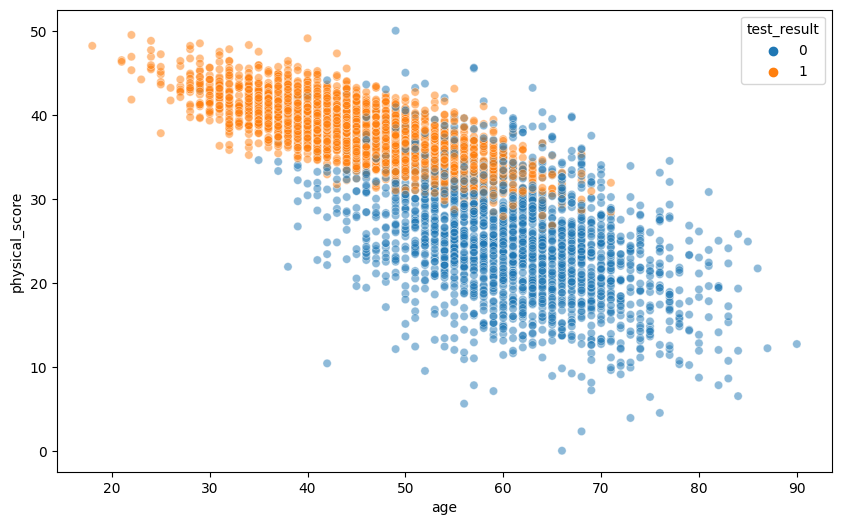

In [10]:
sns.scatterplot(x = "age", y = "physical_score", data = df, hue = "test_result", alpha = 0.5);

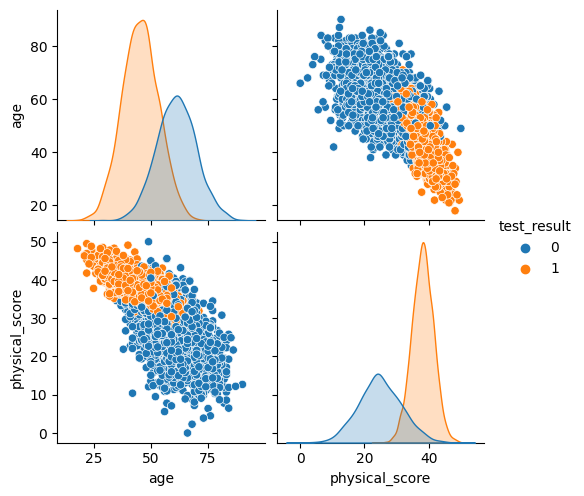

In [11]:
sns.pairplot(df,hue='test_result');

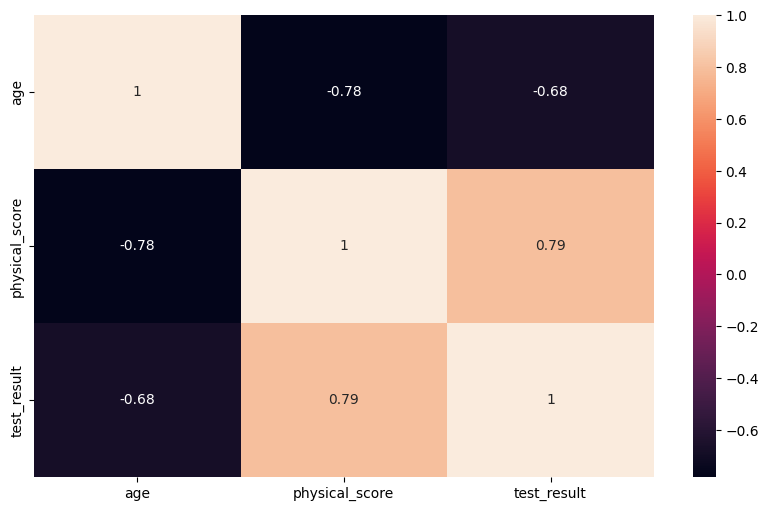

In [12]:
sns.heatmap(df.corr(), annot = True);

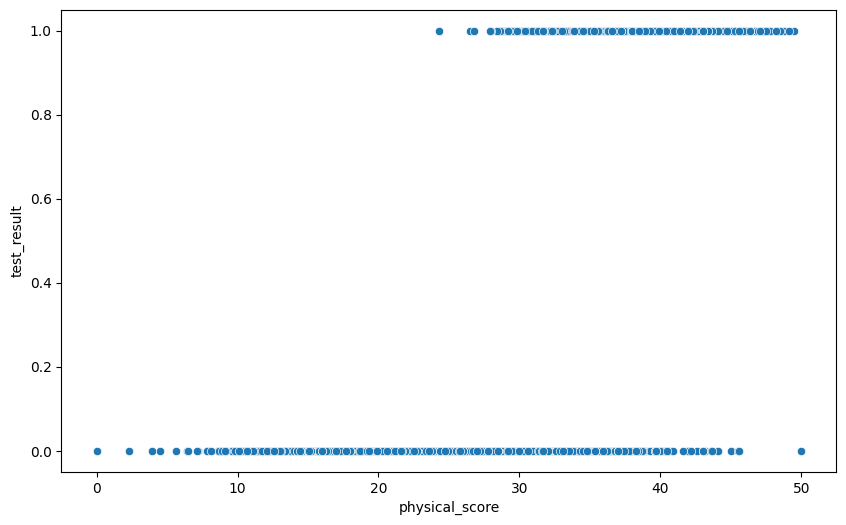

In [13]:
sns.scatterplot(x="physical_score", y = "test_result", data = df);

## Train | Test Split and Scaling

In [14]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [15]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
# from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
df.head(2)

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1


In [23]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [24]:
log_model.intercept_

array([0.48867341])

In [25]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [26]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # 0 ve 1 klaslarına ait olma olasılık değerlerini verir
y_pred_proba  # yukarıdaki 1 ve 0 sıfır değerleri oluşturan olasılık değeri veriyor 0 klasındaki değer > 0.5 => 0 , değilse 1 klası büyktür 1 yazar

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## X_test + y_yest + y_pred + y_pred_proba

In [27]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [28]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [29]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


In [30]:
test_data.sample(10)

,age,physical_score,test_result,pred_proba,pred
3307,43.000,40.900,1,0.991,1
3820,67.000,20.500,0,0.002,0
2804,61.000,11.900,0,0.000,0
212,53.000,33.800,1,0.697,1
188,59.000,36.500,1,0.813,1
1538,60.000,26.800,0,0.061,0
3075,48.000,33.000,1,0.714,1
2309,68.000,23.900,0,0.010,0
3214,52.000,35.900,1,0.859,1
755,76.000,28.500,0,0.034,0


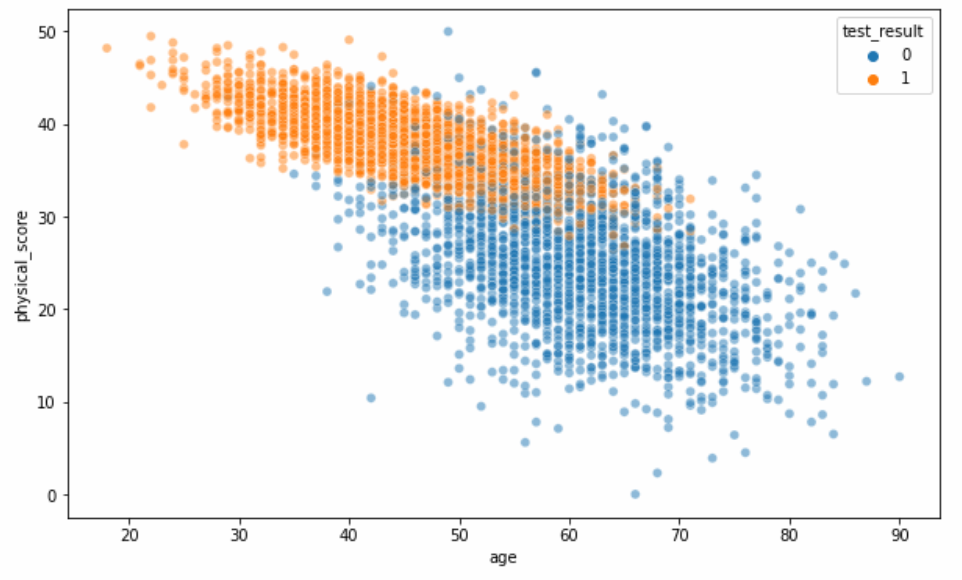

In [31]:
test_data.groupby('test_result').pred.value_counts()  # Dogruluk durumunu gormek icin kullanabiliriz

test_result  pred
0            0       172
             1        21
1            1       293
             0        14
Name: pred, dtype: int64

## Model Performance on Classification Tasks

accuracy

recall

precision

f1_score

confusion_matrix

classification report)

In [32]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [33]:
accuracy_score(y_test,y_pred)

0.93

In [34]:
log_model.score(X_test_scaled, y_test) # log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir.

0.93

In [35]:
precision_score(y_test,y_pred)

0.9331210191082803

In [36]:
recall_score(y_test,y_pred)

0.9543973941368078

In [37]:
f1_score(y_test,y_pred)

0.9436392914653785

In [65]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
# from sklearn.metrics import ConfusionMatrixDisplay, classification_report, plot_confusion_matrix

In [45]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [ ]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

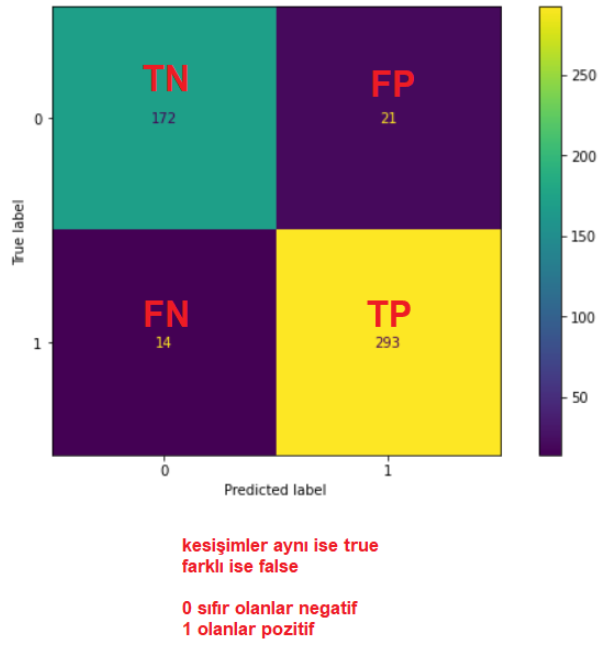

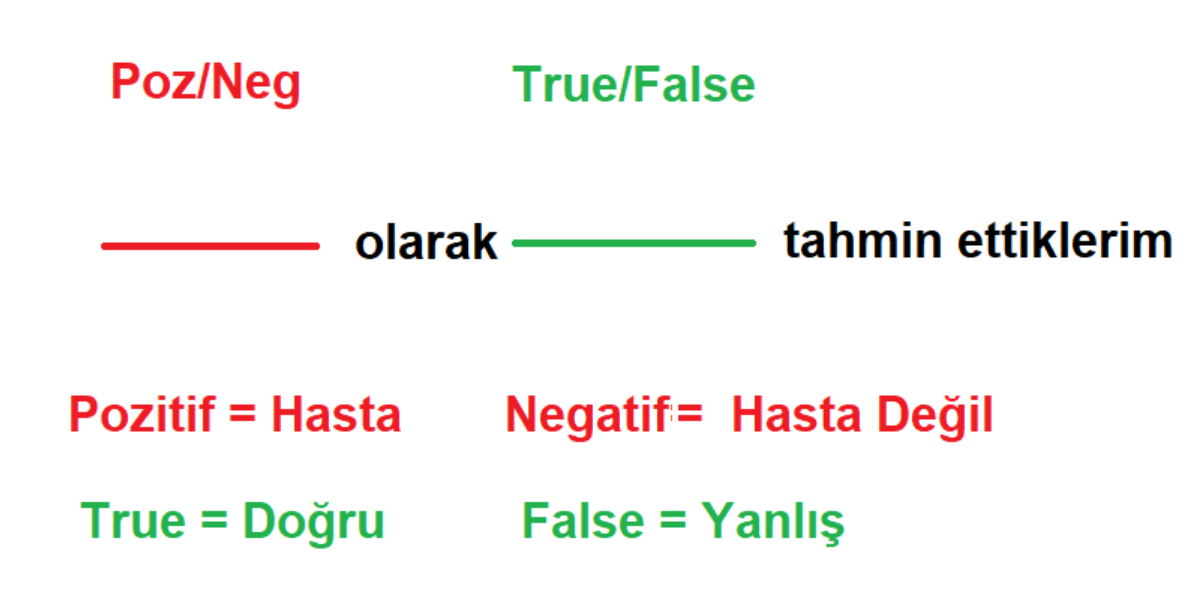

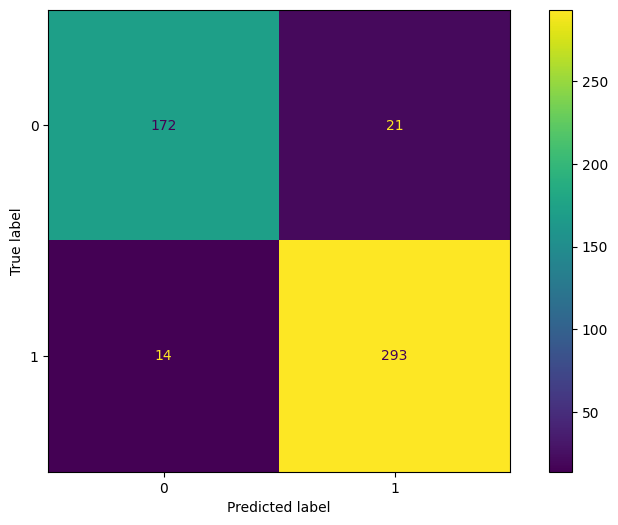

In [67]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [68]:
# plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [58]:
# plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'normalize'

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [ ]:
# Asagidaki gorselde sayilarda yanlislik var dikkat edilmeli...

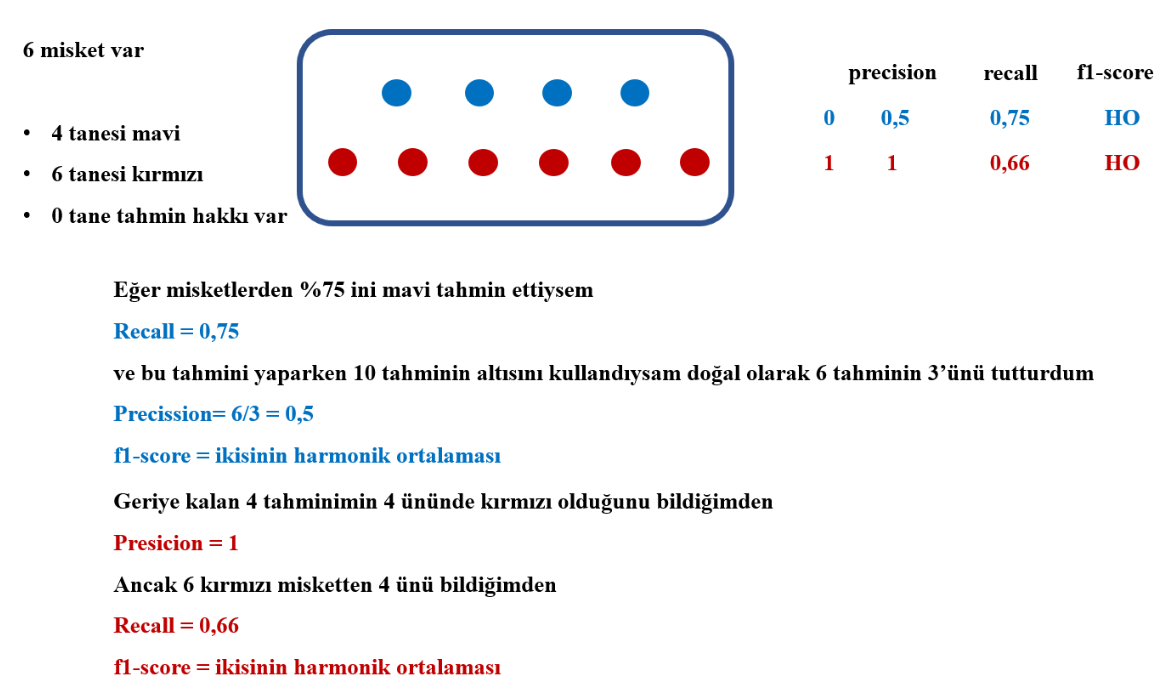

In [59]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



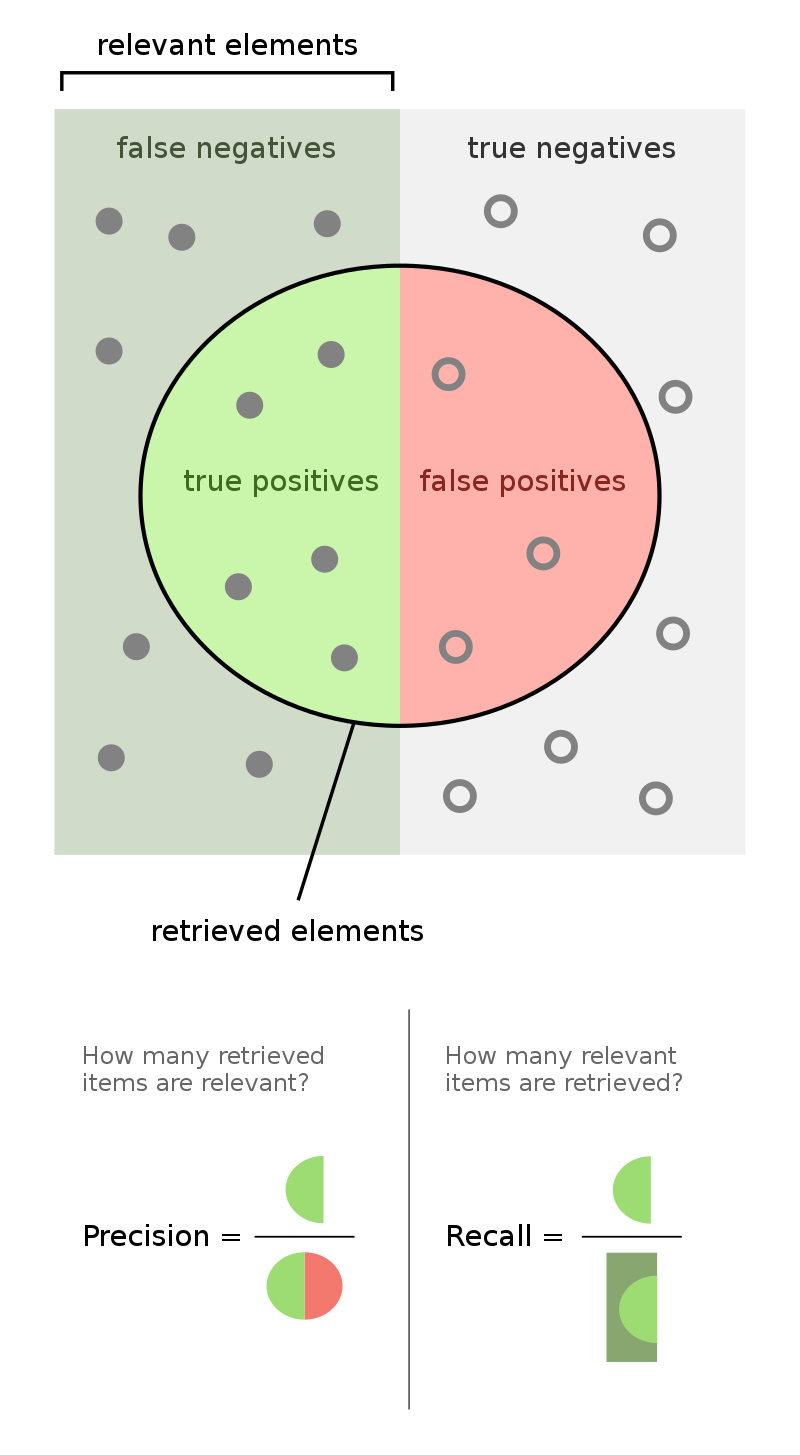